In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

%matplotlib inline


In [87]:
iters = range(50,15950,50)
xvals, time_data = [x*1.0 for x in iters], [x*0.0 for x in iters]
for i,itr in enumerate(iters):
    path = os.environ["PRACSYS_PATH"] + "prx_input/maneuvers/parallel_trials/3_reward_test/" + str(itr) + ".txt"
    f_in = open(path)
    _, _, _, _, _, data = f_in.readline(), f_in.readline(), f_in.readline(), f_in.readline(), f_in.readline(), f_in.read().split(": ")[1]
    time_data[i] = np.matrix(re.sub("[\[\]]","",data)).reshape((10,20))
    
    

In [140]:
iters = range(200,10700,50)
xvals, time_data = [x*1.0 for x in iters], [x*0.0 for x in iters]
for i,itr in enumerate(iters):
    path = os.environ["PRACSYS_PATH"] + "prx_input/maneuvers/parallel_trials/4_test/" + str(itr) + ".txt"
    f_in = open(path)
    _, _, _, _, _, data = f_in.readline(), f_in.readline(), f_in.readline(), f_in.readline(), f_in.readline(), f_in.read().split(": ")[1]
    time_data[i] = np.matrix(re.sub("[\[\]]","",data)).reshape((10,20))
    
    

In [141]:
gp_series = np.zeros((10,len(xvals)))
del_gp_series = np.zeros((10,len(xvals)))
rnd_series = np.zeros((10,len(xvals)))
del_rnd_series = np.zeros((10,len(xvals)))

for i,_ in enumerate(xvals):
    for idx in range(0,10):
        gp_series[idx,i] = np.sum(time_data[i][:,idx])
        del_gp_series[idx,i] = gp_series[idx,i] - (0.0 if i == 0 else gp_series[idx,i-1])
        rnd_series[idx,i] = np.sum(time_data[i][:,idx+10])
        del_rnd_series[idx,i] = rnd_series[idx,i] - (0.0 if i == 0 else rnd_series[idx,i-1])

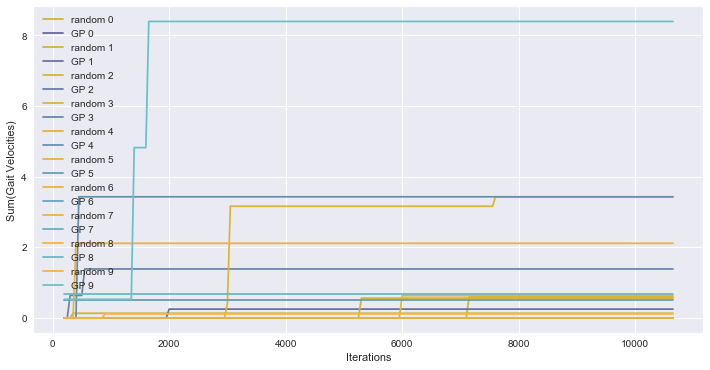

In [143]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
for i,(rnd_ser,gp_ser) in enumerate(zip(rnd_series,gp_series)):
    ax.plot(xvals, rnd_ser, c=(0.8+(0.02*i),0.7,0.2), label="random %d" % i)
    ax.plot(xvals, gp_ser, c=(0.4,0.4+(0.04*i),0.6+(0.02*i)),label="GP %d" % i)
ax.set_xlabel("Iterations")
ax.set_ylabel("Sum(Gait Velocities)")
ax.legend()

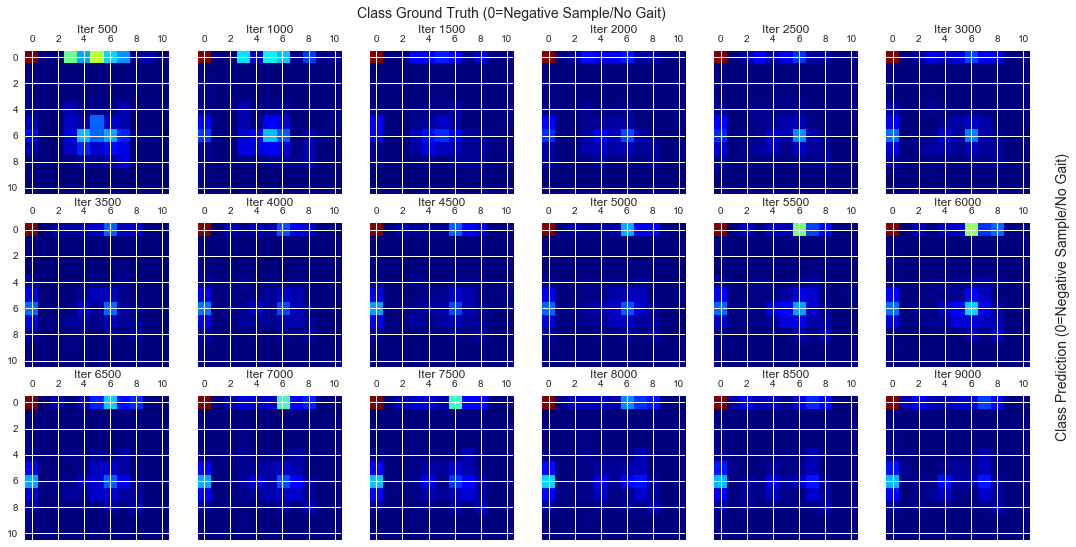

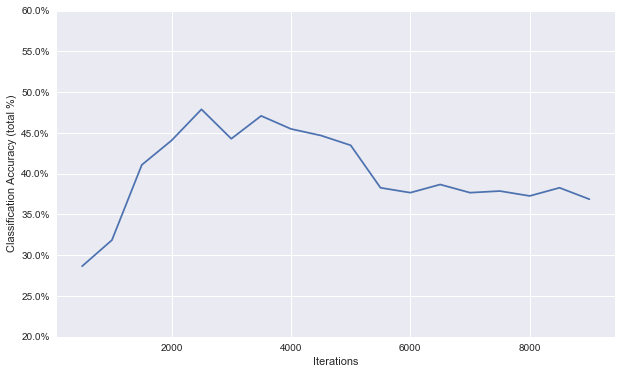

In [232]:
iters = range(500,9500,500)
xvals, time_data = [x*1.0 for x in iters], [x*0.0 for x in iters]

fig, ax = plt.subplots(3,6, sharex=True, sharey=True, figsize=(18,9))
fig.subplots_adjust(hspace=.2)
conf_mtx = []
cls_acc = []

for i,itr in enumerate(iters):
    path = os.environ["PRACSYS_PATH"] + "prx_input/maneuvers/parallel_trials/7_svm_norand/" + str(itr) + ".npy"
    conf_mtx.append(np.load(path))
    cls_acc.append(np.sum(np.diagonal(conf_mtx[i]))*1.0/np.sum(conf_mtx[i]))
    ax.flatten()[i].matshow(conf_mtx[i].astype(float)/np.max(conf_mtx), cmap=plt.cm.jet)
    ax.flatten()[i].set_title('Iter %d'%itr, y=1.08)
fig.text(0.5, 0.93, 'Class Ground Truth (0=Negative Sample/No Gait)', ha='center', fontsize=14)
fig.text(0.92, 0.5, 'Class Prediction (0=Negative Sample/No Gait)', va='center', rotation='vertical', fontsize=14)
plt.show()

fig2, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(iters, cls_acc)
ax.set_ylabel('Classification Accuracy (total %)')
ax.set_xlabel('Iterations')
ax.set_ylim(0.2,0.6)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])
plt.show()

In [160]:
print conf_mtx[0].astype(float)/np.max(conf_mtx[0])

[[ 1.          0.          0.          0.48314607  0.29213483  0.58426966
   0.33707865  0.26966292  0.02247191  0.03370787  0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.01123596  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.01123596
   0.          0.          0.          0.          0.        ]
 [ 0.01123596  0.          0.          0.04494382  0.          0.01123596
   0.          0.04494382  0.          0.          0.        ]
 [ 0.05617978  0.          0.          0.05617978  0.03370787  0.2247191
   0.06741573  0.04494382  0.          0.          0.        ]
 [ 0.13483146  0.          0.          0.08988764  0.31460674  0.2247191
   0.29213483  0.15730337  0.01123596  0.01123596  0.        ]
 [ 0.04494382  0.          0.          0.05617978  0.157303